In [46]:
# This code has been adapted from https://github.com/koen-aerts/ECG_ML
%load_ext autoreload
%autoreload 2
import numpy as np
import wfdb
import matplotlib.pyplot as plt
from tqdm import tqdm
import sklearn
import sklearn.metrics


# # read in signal
# record = wfdb.rdrecord(data_path+'100')
# print(record.__dict__)

# # read in annotations
# annotation = wfdb.rdann(data_path+'100', extension='atr')
# annotation.__dict__

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
def plot_signal(datfile, SAMPLE_START, SAMPLE_SIZE, CHANNEL):
    record = wfdb.rdrecord(datfile)
    annotation = wfdb.rdann(datfile, 'atr')

    # Get data and annotations for the samples selected below.
    SAMPLE_END = SAMPLE_START + SAMPLE_SIZE
    channel = record.p_signal[SAMPLE_START:SAMPLE_END, CHANNEL]

    # Plot the heart beats. Time scale is number of readings divided by sampling frequency.
    times = (np.arange(SAMPLE_START, SAMPLE_END, dtype='float')) / record.fs
    plt.figure(figsize=(20,10))
    plt.plot(times, channel)

    # Extract annotations.
    where = np.logical_and(annotation.sample >= SAMPLE_START, annotation.sample < SAMPLE_END)
    annotation_symbol = np.array(annotation.symbol)[where]
    annotimes = annotation.sample[where] / record.fs

    # Plot the Annotations 
    plt.scatter(annotimes, np.ones_like(annotimes) * channel.max() * 1.4, c='r')
    for idx in range(len(annotimes)):
        plt.annotate(annotation_symbol[idx], xy = (annotimes[idx], channel.max() * 1.3))

    plt.xlim([SAMPLE_START / record.fs, (SAMPLE_END / record.fs) + 1])
    plt.xlabel('Offset (Seconds from start)')
    plt.ylabel(record.sig_name[CHANNEL])
    plt.grid()
    plt.show()

# data_path = '/zfsauton/project/public/chufang/mit-bih-arrhythmia-database-1.0.0/'
# datfile = data_path+'100'
# SAMPLE_START=114000   # Start of the sample in the file.
# SAMPLE_SIZE=4000      # Number of readings (360 per second).
# CHANNEL=0             # There are 2 channels
# plot_signal(datfile, SAMPLE_START, SAMPLE_SIZE, CHANNEL)

In [48]:
import datasets
output_dict = datasets.load_mit_bih(data_path='/zfsauton/project/public/chufang/MIT-BIH/', load_method='windows')


  0%|          | 0/48 [00:00<?, ?it/s]

Sampling frequency used for this record: 360
Shape of loaded data array: (650000, 2)
Number of loaded annotations: 2274
ECG channel type: MLII


  4%|▍         | 2/48 [00:00<00:05,  8.24it/s]

2.6666666666666667e-05
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.6666666666666667e-05
2.6666666666666667e-05
5.333333333333333e-05
5.333333333333333e-05
5.333333333333333e-05
5.333333333333333e-05
5.333333333333333e-05
5.333333333333333e-05
5.333333333333333e-05
8e-05
5.333333333333333e-05
5.333333333333333e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
5.333333333333333e-05
5.333333333333333e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
0.0
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
0.0
0.0
0.0
0.0
0.0
ECG channel type: V5
2.6666666666666667e-05
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.6666666666666667e-05
2.66666

  8%|▊         | 4/48 [00:00<00:05,  8.14it/s]

Sampling frequency used for this record: 360
Shape of loaded data array: (650000, 2)
Number of loaded annotations: 2192
ECG channel type: V5
0.0029333333333333334
0.002693333333333333
0.002426666666666667
0.00208
0.00176
0.0014133333333333333
0.0010666666666666667
0.0008533333333333333
0.0009066666666666666
0.0012533333333333333
0.0012533333333333333
0.0014933333333333333
0.0017866666666666667
0.002106666666666667
0.0024533333333333334
0.0027733333333333334
0.00312
0.00336
0.00336
0.00336
0.00336
0.00336
0.00336
0.00336
0.00336
0.00336
0.00336
0.00336
0.00336
0.00336
0.00336
0.00336
0.0033333333333333335
0.00336
0.00336
0.00336
0.00336
0.0033333333333333335
0.00336
0.00336
0.00336
0.00336
0.00336
0.00336
0.00336
0.00336
0.00336
0.0033866666666666667
0.00336
0.00336
0.00336
ECG channel type: V2
0.0029333333333333334
0.002693333333333333
0.002426666666666667
0.00208
0.00176
0.0014133333333333333
0.0010666666666666667
0.0008533333333333333
0.0009066666666666666
0.0012533333333333333
0.001

 12%|█▎        | 6/48 [00:00<00:05,  8.00it/s]

Sampling frequency used for this record: 360
Shape of loaded data array: (650000, 2)
Number of loaded annotations: 2311
ECG channel type: V5
0.0033333333333333335
0.00328
0.0032266666666666667
0.0032
0.003173333333333333
0.0030933333333333334
0.0030666666666666668
0.00304
0.003013333333333333
0.003013333333333333
0.00304
0.002853333333333333
0.002586666666666667
0.0026133333333333334
0.00264
0.002693333333333333
0.00272
0.00264
0.0023466666666666666
0.002213333333333333
0.002213333333333333
0.0024533333333333334
0.002746666666666667
0.002746666666666667
0.002746666666666667
0.002586666666666667
0.0023466666666666666
0.0024533333333333334
0.0028
0.0029866666666666665
0.00296
0.0029066666666666668
0.0029333333333333334
0.00288
0.002853333333333333
0.00304
0.0032533333333333333
0.0032533333333333333
0.0032
0.0032
0.003173333333333333
0.003173333333333333
0.003173333333333333
0.003173333333333333
0.003173333333333333
0.00312
0.00312
0.0030933333333333334
0.0030933333333333334
0.00304
0.003

 17%|█▋        | 8/48 [00:00<00:04,  8.18it/s]

Sampling frequency used for this record: 360
Shape of loaded data array: (650000, 2)
Number of loaded annotations: 2098
ECG channel type: MLII
0.0002666666666666667
0.0004533333333333333
0.0006666666666666666
0.00088
0.0010933333333333333
0.0012533333333333333
0.0014133333333333333
0.0014933333333333333
0.0015733333333333333
0.0014933333333333333
0.0013066666666666667
0.00112
0.0009066666666666666
0.0006933333333333333
0.00048
0.00032
0.00018666666666666666
0.00010666666666666667
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.6666666666666667e-05
5.333333333333333e-05
5.333333333333333e-05
5.333333333333333e-05
5.333333333333333e-05
5.333333333333333e-05
5.333333333333333e-05
5.333333333333333e-05
5.333333333333333e-05
5.333333333333333e-05
2.6666666666666667e-05
0.0
0.0
0.0
0.0
0.0
0.0
0.0
ECG channel type: V1
0.00026666

 21%|██        | 10/48 [00:01<00:04,  8.13it/s]

Sampling frequency used for this record: 360
Shape of loaded data array: (650000, 2)
Number of loaded annotations: 1824
ECG channel type: MLII
5.333333333333333e-05
5.333333333333333e-05
2.6666666666666667e-05
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
5.333333333333333e-05
5.333333333333333e-05
5.333333333333333e-05
5.333333333333333e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.333333333333333e-05
5.333333333333333e-05
5.333333333333333e-05
8e-05
8e-05
8e-05
0.00010666666666666667
0.00010666666666666667
0.00010666666666666667
0.00010666666666666667
8e-05
8e-05
ECG channel type: V1
5.333333333333333e-05
5.333333333333333e-05
2.6666666666666667e-05
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.6666666666666667e-05
2.66666

 25%|██▌       | 12/48 [00:01<00:04,  8.21it/s]

Sampling frequency used for this record: 360
Shape of loaded data array: (650000, 2)
Number of loaded annotations: 2133
ECG channel type: MLII
0.0032
0.0032
0.003173333333333333
0.003173333333333333
0.003173333333333333
0.003173333333333333
0.003173333333333333
0.0032
0.0032
0.0032266666666666667
0.0032266666666666667
0.0032533333333333333
0.00328
0.00328
0.00328
0.00328
0.00328
0.0032533333333333333
0.0032533333333333333
0.0032533333333333333
0.0032533333333333333
0.0032266666666666667
0.0032266666666666667
0.0032266666666666667
0.0032266666666666667
0.0032266666666666667
0.0032266666666666667
0.0032266666666666667
0.0032266666666666667
0.0032
0.0032
0.0032
0.0032
0.0032
0.0032
0.0032
0.0032
0.0032266666666666667
0.0032266666666666667
0.0032266666666666667
0.0032266666666666667
0.0032266666666666667
0.0032266666666666667
0.0032266666666666667
0.0032533333333333333
0.0032533333333333333
0.00328
0.0032533333333333333
0.0032533333333333333
0.00328
0.0033066666666666665
ECG channel type: 

 29%|██▉       | 14/48 [00:01<00:03,  8.54it/s]

Sampling frequency used for this record: 360
Shape of loaded data array: (650000, 2)
Number of loaded annotations: 1796
ECG channel type: MLII
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.6666666666666667e-05
2.6666666666666667e-05
5.333333333333333e-05
5.333333333333333e-05
5.333333333333333e-05
5.333333333333333e-05
5.333333333333333e-05
5.333333333333333e-05
5.333333333333333e-05
5.333333333333333e-05
2.6666666666666667e-05
5.333333333333333e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
0.0
0.0
ECG channel type: V1
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.66666666666666

 33%|███▎      | 16/48 [00:01<00:03,  8.43it/s]

Sampling frequency used for this record: 360
Shape of loaded data array: (650000, 2)
Number of loaded annotations: 1962
ECG channel type: MLII
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
ECG channel type: V1
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Sampling frequency used for this record: 360
Shape of loaded data array: (650000, 2)
Number of loaded annotations: 2421
ECG channel type: MLII
5.333333333333333e-05
5.333333333333333e-05
5.333333333333333e-05
5.333333333333333e-05
5.333333333333333e-05
0.00010666666666666667
0.00013333333333333334
0.00013333333333333334
0.00013333333333333334
0.00013333333333333334
0.00010666666666666667
0.00010666666666666667
0.000106666666

 38%|███▊      | 18/48 [00:02<00:03,  8.50it/s]

Sampling frequency used for this record: 360
Shape of loaded data array: (650000, 2)
Number of loaded annotations: 1539
ECG channel type: MLII
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
ECG channel type: V2
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Sampling frequency used for this record: 360
Shape of loaded data array: (650000, 2)
Number of loaded annotations: 2301
ECG channel type: MLII
0.0033866666666666667
0.0033866666666666667
0.0034133333333333333
0.0034133333333333333
0.0033866666666666667
0.0033866666666666667
0.0033866666666666667
0.0034133333333333333
0.0033866666666666667
0.00336
0.0033333333333333335
0.0033066666666666665
0.0033066666666666665
0.00330666666

 42%|████▏     | 20/48 [00:02<00:03,  8.61it/s]

Sampling frequency used for this record: 360
Shape of loaded data array: (650000, 2)
Number of loaded annotations: 2094
ECG channel type: MLII
0.0006666666666666666
0.0006133333333333334
0.0006133333333333334
0.00056
0.0005066666666666667
0.00048
0.0004533333333333333
0.0005066666666666667
0.00056
0.00064
0.00072
0.0008
0.0008
0.0008
0.0008533333333333333
0.00088
0.0008266666666666666
0.0008266666666666666
0.0008533333333333333
0.0008533333333333333
0.00088
0.0008533333333333333
0.0009333333333333333
0.0009066666666666666
0.0008533333333333333
0.0008533333333333333
0.0009066666666666666
0.0009333333333333333
0.0008266666666666666
0.0006933333333333333
0.0005866666666666667
0.0005866666666666667
0.0005066666666666667
0.0005333333333333334
0.0005333333333333334
0.0005866666666666667
0.0005333333333333334
0.0004533333333333333
0.00042666666666666667
0.00042666666666666667
0.00042666666666666667
0.0003733333333333333
0.00034666666666666667
0.0002933333333333333
0.0002933333333333333
0.0002

 46%|████▌     | 22/48 [00:02<00:02,  8.70it/s]

Sampling frequency used for this record: 360
Shape of loaded data array: (650000, 2)
Number of loaded annotations: 2479
ECG channel type: MLII
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
ECG channel type: V1
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Sampling frequency used for this record: 360
Shape of loaded data array: (650000, 2)
Number of loaded annotations: 1519
ECG channel type: MLII
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05


 48%|████▊     | 23/48 [00:02<00:02,  8.77it/s]

Sampling frequency used for this record: 360
Shape of loaded data array: (650000, 2)
Number of loaded annotations: 1634
ECG channel type: MLII
0.0022933333333333334
0.002266666666666667
0.0022933333333333334
0.002266666666666667
0.002266666666666667
0.002266666666666667
0.0022933333333333334
0.0022933333333333334
0.00232
0.0022933333333333334
0.0022933333333333334
0.0022933333333333334
0.0022933333333333334
0.0022933333333333334
0.0022933333333333334
0.0022933333333333334
0.0022933333333333334
0.00232
0.0023466666666666666
0.002426666666666667
0.00248
0.002533333333333333
0.002533333333333333
0.002586666666666667
0.0026133333333333334
0.0026666666666666666
0.0026666666666666666
0.0026666666666666666
0.00264
0.002586666666666667
0.002533333333333333
0.002533333333333333
0.002533333333333333
0.002533333333333333
0.0025066666666666666
0.00248
0.00248
0.0024533333333333334
0.0024533333333333334
0.0024533333333333334
0.0024533333333333334
0.002426666666666667
0.002426666666666667
0.00242666

 52%|█████▏    | 25/48 [00:02<00:02,  8.40it/s]

0.0010666666666666667
0.0010666666666666667
0.0012266666666666667
0.0012
0.00112
Sampling frequency used for this record: 360
Shape of loaded data array: (650000, 2)
Number of loaded annotations: 2039
ECG channel type: MLII
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
0.0
0.0
0.0
0.0
0.0
0.0
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
5.333333333333333e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
8e-05
0.00013333333333333334
0.00018666666666666666
0.00016
0.00016
0.0002666666666666667
0.0002933333333333333
0.00032
0.0003733333333333333
0.00048
0.0005066666666666667
0.0004533333333333333
0.00048
0.00056
0.0006666666666666666
0.00056
0.00056
0.0006133333333333334


 56%|█████▋    | 27/48 [00:03<00:02,  8.06it/s]

5.333333333333333e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
0.0
0.0
0.0
2.6666666666666667e-05
8e-05
ECG channel type: V1
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.6666666666666667e-05
2.6666666666666667e-05
5.333333333333333e-05
5.333333333333333e-05
8e-05
8e-05
8e-05
8e-05
8e-05
8e-05
5.333333333333333e-05
8e-05
5.333333333333333e-05
5.333333333333333e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
5.333333333333333e-05
5.333333333333333e-05
5.333333333333333e-05
8e-05
5.333333333333333e-05
5.333333333333333e-05
5.333333333333333e-05
8e-05
8e-05
8e-05
5.333333333333333e-05
5.333333333333333e-05
5.333333333333333e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
0.0
0.0
0.0
2.6666666666666667e-05
8e-05
Sampling frequency used for this record: 360
Shape of loaded data array: (650000, 2)
Number of lo

 60%|██████    | 29/48 [00:03<00:02,  8.10it/s]

Sampling frequency used for this record: 360
Shape of loaded data array: (650000, 2)
Number of loaded annotations: 2672
ECG channel type: MLII
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
0.0002933333333333333
0.00056
0.0005866666666666667
0.0005866666666666667
0.0005866666666666667
0.00056
0.0005866666666666667
0.0005866666666666667
0.0005866666666666667
0.0005866666666666667
0.00032
5.333333333333333e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
ECG channel type: V1
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666666666666667e-05
2.6666

 65%|██████▍   | 31/48 [00:03<00:02,  7.84it/s]

Sampling frequency used for this record: 360
Shape of loaded data array: (650000, 2)
Number of loaded annotations: 3040
ECG channel type: MLII
0.0020266666666666666
0.0019466666666666666
0.002
0.002106666666666667
0.00224
0.0023466666666666666
0.002426666666666667
0.0023466666666666666
0.002373333333333333
0.0024533333333333334
0.00248
0.002426666666666667
0.00232
0.0021866666666666666
0.002213333333333333
0.002213333333333333
0.002106666666666667
0.002213333333333333
0.00224
0.0021866666666666666
0.002213333333333333
0.0021866666666666666
0.0021333333333333334
0.0021866666666666666
0.0020533333333333332
0.0019466666666666666
0.0018133333333333332
0.00176
0.0017066666666666667
0.0017066666666666667
0.00168
0.0017866666666666667
0.0018933333333333332
0.0020533333333333332
0.0021866666666666666
0.0022933333333333334
0.0025066666666666666
0.002586666666666667
0.0026666666666666666
0.002746666666666667
0.0027733333333333334
0.0028266666666666666
0.0028266666666666666
0.0028
0.0028
0.00288


 69%|██████▉   | 33/48 [00:04<00:01,  7.82it/s]

Sampling frequency used for this record: 360
Shape of loaded data array: (650000, 2)
Number of loaded annotations: 2685
ECG channel type: MLII
0.0002933333333333333
0.0002666666666666667
0.0002666666666666667
0.0004
0.0004
0.0003733333333333333
0.00034666666666666667
0.00032
0.00032
0.00032
0.00034666666666666667
0.0003733333333333333
0.00034666666666666667
0.00018666666666666666
0.00018666666666666666
0.00024
0.0002666666666666667
0.0002933333333333333
0.0002933333333333333
0.00034666666666666667
0.0002666666666666667
0.0002666666666666667
0.0002666666666666667
0.00024
0.00021333333333333333
0.00018666666666666666
0.00016
0.00013333333333333334
0.00013333333333333334
8e-05
8e-05
0.00024
0.00021333333333333333
0.00021333333333333333
0.0002666666666666667
0.00024
0.0002933333333333333
0.0002933333333333333
0.00034666666666666667
0.00034666666666666667
0.0004
0.00021333333333333333
0.0002666666666666667
0.00032
0.00032
0.00032
0.0002666666666666667
0.0002666666666666667
0.000266666666666

 73%|███████▎  | 35/48 [00:04<00:01,  7.83it/s]

Sampling frequency used for this record: 360
Shape of loaded data array: (650000, 2)
Number of loaded annotations: 3294
ECG channel type: MLII
5.333333333333333e-05
8e-05
0.0002666666666666667
0.00048
0.0006666666666666666
0.0008533333333333333
0.0010933333333333333
0.0012266666666666667
0.0014133333333333333
0.0016266666666666667
0.0018666666666666666
0.0020533333333333332
0.00208
0.00208
0.0020266666666666666
0.0019733333333333334
0.0018133333333333332
0.0017333333333333333
0.0016
0.0015466666666666667
0.0013866666666666667
0.0012533333333333333
0.00112
0.0009866666666666667
0.00088
0.0007733333333333333
0.0006933333333333333
0.00064
0.0005866666666666667
0.0004533333333333333
0.0003733333333333333
0.0002933333333333333
0.00024
0.00021333333333333333
0.0004
0.0006133333333333334
0.0008266666666666666
0.0009866666666666667
0.0012533333333333333
0.0013333333333333333
0.00152
0.0017866666666666667
0.002
0.002106666666666667
0.0019733333333333334
0.0018133333333333332
0.00181333333333333

 77%|███████▋  | 37/48 [00:04<00:01,  7.86it/s]

Sampling frequency used for this record: 360
Shape of loaded data array: (650000, 2)
Number of loaded annotations: 3400
ECG channel type: MLII
0.0004
0.00042666666666666667
0.0004
0.00032
0.00034666666666666667
0.0002666666666666667
0.00032
0.00034666666666666667
0.0004
0.0003733333333333333
0.0004
0.0003733333333333333
0.0004
0.0004
0.0003733333333333333
0.0004
0.00032
0.0002666666666666667
0.00018666666666666666
0.00018666666666666666
0.00016
0.00016
0.00018666666666666666
0.00016
0.00016
0.00013333333333333334
0.00016
0.00021333333333333333
0.00018666666666666666
0.00021333333333333333
0.00018666666666666666
0.00018666666666666666
0.00024
0.0002666666666666667
0.0002933333333333333
0.0002933333333333333
0.0002666666666666667
0.00024
0.00034666666666666667
0.0003733333333333333
0.00034666666666666667
0.0003733333333333333
0.00032
0.0002933333333333333
0.0002933333333333333
0.0003733333333333333
0.0004
0.00042666666666666667
0.00032
0.0002933333333333333
0.00034666666666666667
ECG cha

 81%|████████▏ | 39/48 [00:04<00:01,  8.15it/s]

Sampling frequency used for this record: 360
Shape of loaded data array: (650000, 2)
Number of loaded annotations: 2312
ECG channel type: MLII
0.00024
0.00024
0.00024
0.00024
0.00021333333333333333
0.00021333333333333333
0.00024
0.00024
0.00018666666666666666
0.00016
5.333333333333333e-05
5.333333333333333e-05
8e-05
0.00010666666666666667
0.00010666666666666667
0.00010666666666666667
8e-05
8e-05
8e-05
8e-05
0.00013333333333333334
0.00018666666666666666
0.00016
0.00016
0.00016
0.00018666666666666666
0.00021333333333333333
0.00021333333333333333
0.00021333333333333333
0.00024
0.00021333333333333333
0.00016
0.00018666666666666666
0.00016
0.00016
0.00013333333333333334
0.00010666666666666667
8e-05
0.00013333333333333334
0.00010666666666666667
8e-05
0.00010666666666666667
0.00010666666666666667
0.00016
0.00016
0.00016
0.00016
0.00016
0.00010666666666666667
0.00013333333333333334
0.00021333333333333333
ECG channel type: V1
0.00024
0.00024
0.00024
0.00024
0.00021333333333333333
0.000213333333

 85%|████████▌ | 41/48 [00:05<00:00,  8.11it/s]

Sampling frequency used for this record: 360
Shape of loaded data array: (650000, 2)
Number of loaded annotations: 2462
ECG channel type: MLII
0.0006133333333333334
0.0005866666666666667
0.0006133333333333334
0.0006666666666666666
0.0006933333333333333
0.00072
0.0006933333333333333
0.0007733333333333333
0.0008
0.0007466666666666666
0.0007466666666666666
0.0008
0.0008
0.0007733333333333333
0.0007733333333333333
0.0008
0.0008
0.0008
0.0008
0.00088
0.0008533333333333333
0.0008
0.0008
0.0007466666666666666
0.0006933333333333333
0.0006933333333333333
0.00072
0.00072
0.0006666666666666666
0.0006666666666666666
0.0006666666666666666
0.00072
0.0006933333333333333
0.00072
0.0007733333333333333
0.0007733333333333333
0.0007733333333333333
0.00072
0.00072
0.0006933333333333333
0.00072
0.0006933333333333333
0.00072
0.0007733333333333333
0.0007466666666666666
0.0008
0.0008266666666666666
0.0008533333333333333
0.00088
0.0008533333333333333
0.00088
ECG channel type: V1
0.0006133333333333334
0.00058666

 90%|████████▉ | 43/48 [00:05<00:00,  8.09it/s]

Sampling frequency used for this record: 360
Shape of loaded data array: (650000, 2)
Number of loaded annotations: 2643
ECG channel type: MLII
0.00010666666666666667
0.00010666666666666667
0.00024
0.00034666666666666667
0.00048
0.00056
0.0005866666666666667
0.0006133333333333334
0.0006133333333333334
0.00064
0.00064
0.00064
0.00056
0.00042666666666666667
0.0002933333333333333
0.00021333333333333333
0.00016
0.00016
0.00013333333333333334
0.00013333333333333334
0.00016
0.00016
0.00010666666666666667
0.00010666666666666667
0.00013333333333333334
0.00013333333333333334
0.00021333333333333333
0.00016
0.00016
0.00013333333333333334
0.00010666666666666667
0.00010666666666666667
0.00016
0.00016
0.00018666666666666666
0.00021333333333333333
0.00021333333333333333
0.0002933333333333333
0.0002933333333333333
0.0002933333333333333
0.00034666666666666667
0.0004
0.00034666666666666667
0.0004
0.0003733333333333333
0.00042666666666666667
0.00064
0.0010666666666666667
0.0015733333333333333
0.00208
0.00

 92%|█████████▏| 44/48 [00:05<00:00,  7.79it/s]

Sampling frequency used for this record: 360
Shape of loaded data array: (650000, 2)
Number of loaded annotations: 2466
ECG channel type: MLII
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
ECG channel type: V1
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Sampling frequency used for this record: 360
Shape of loaded data array: (650000, 2)
Number of loaded annotations: 2011
ECG channel type: MLII
0.002693333333333333
0.002426666666666667
0.00224
0.0021333333333333334
0.002
0.0020266666666666666
0.0020266666666666666
0.002
0.002
0.0019733333333333334
0.002213333333333333
0.0025066666666666666
0.0026666666666666666
0.0027733333333333334
0.0029066666666666668
0.00288
0.00288
0.00

 96%|█████████▌| 46/48 [00:05<00:00,  7.78it/s]

0.002693333333333333
0.002426666666666667
0.00224
0.0021333333333333334
0.002
0.0020266666666666666
0.0020266666666666666
0.002
0.002
0.0019733333333333334
0.002213333333333333
0.0025066666666666666
0.0026666666666666666
0.0027733333333333334
0.0029066666666666668
0.00288
0.00288
0.0029066666666666668
0.0029066666666666668
0.0029333333333333334
0.0029333333333333334
0.0029333333333333334
0.0029066666666666668
0.00264
0.0025066666666666666
0.002373333333333333
0.0021866666666666666
0.0019733333333333334
0.00184
0.0017066666666666667
0.0014133333333333333
0.00112
0.0008533333333333333
0.0008266666666666666
0.0006666666666666666
0.0005066666666666667
0.0004
0.00032
0.00016
0.0
0.0
0.0
0.0
0.0
0.0
0.0002933333333333333
0.0005866666666666667
0.00088
0.0011733333333333333
0.00144
0.0017333333333333333
Sampling frequency used for this record: 360
Shape of loaded data array: (650000, 2)
Number of loaded annotations: 1816
ECG channel type: MLII
0.00272
0.00272
0.002693333333333333
0.00282666666

 98%|█████████▊| 47/48 [00:05<00:00,  7.56it/s]

Sampling frequency used for this record: 360
Shape of loaded data array: (650000, 2)
Number of loaded annotations: 3152
ECG channel type: MLII
0.0013066666666666667
0.0011733333333333333
0.0012
0.0012533333333333333
0.0012533333333333333
0.00136
0.00144
0.0014666666666666667
0.00144
0.0015466666666666667
0.0015733333333333333
0.00168
0.0017333333333333333
0.0016
0.00152
0.0013866666666666667
0.0013066666666666667
0.0012266666666666667
0.0012266666666666667
0.0011733333333333333
0.0012
0.0012
0.00112
0.0011733333333333333
0.0011733333333333333
0.0011733333333333333
0.0011733333333333333
0.0012
0.0012
0.0012
0.0012533333333333333
0.00128
0.0012
0.0011733333333333333
0.0012
0.0012
0.0012
0.0012
0.0012266666666666667
0.0012533333333333333
0.0012
0.00112
0.0012
0.0012266666666666667
0.0012
0.0012533333333333333
0.00128
0.00128
0.0012533333333333333
0.0012266666666666667
0.0012533333333333333
ECG channel type: V1
0.0013066666666666667
0.0011733333333333333
0.0012
0.0012533333333333333
0.0012

100%|██████████| 48/48 [00:05<00:00,  8.08it/s]

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [49]:
# print(np.stack(output_dict['100']['MLII']['data']).shape)
# print(len(output_dict['100']['MLII']['labels']))
ys = output_dict['100']['MLII']['labels']
np.unique(ys, return_counts=True)


(array([0]), array([51]))

In [50]:
import sklearn
import sklearn.ensemble
import ecg_featurization

all_x = []
all_y = []

for subject in output_dict.keys():
    for channel in output_dict[subject].keys():
        data = np.array(ecg_featurization.featurize_windows(windows=output_dict[subject][channel]['data'], sampling_rate=125))

        all_x.append(data)
        all_y.append(np.array(output_dict[subject][channel]['labels']))

all_x = np.concatenate(all_x)
all_y = np.concatenate(all_y)

In [51]:
np.unique(all_y, return_counts=True)


(array([0, 1]), array([3206, 1690]))

(3280, 13) (1616, 13)
acc 0.9498762376237624
auc 0.983189850863893


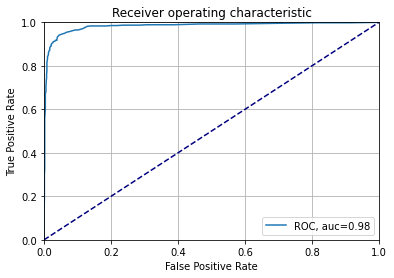

In [52]:
model = sklearn.ensemble.RandomForestClassifier(random_state=42)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(all_x, all_y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
model.fit(X_train, y_train)

scores = model.predict_proba(X_test)[:,1]
acc = model.score(X_test, y_test)
auc = sklearn.metrics.roc_auc_score(y_test, scores)
print('acc', acc)
print('auc', auc)
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, scores, pos_label=1)
plt.plot(fpr, tpr, label='ROC, auc={0:0.2f}'.format(auc))
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate"); plt.title("Receiver operating characteristic")
plt.legend(loc="lower right"); plt.grid()

In [53]:
import sqis

all_preds = []
all_y = []

for subject in tqdm(output_dict.keys()):
    for channel in output_dict[subject].keys():
        data = output_dict[subject][channel]['data']
        
        predictions = [
            sqis.sqi_template_matching_correlation(ecg_window=data[i], sampling_rate=125, show=False)
            for i in range(len(data))
            ]
        
        all_preds.append(np.array(predictions))
        all_y.append(np.array(output_dict[subject][channel]['labels']))

all_preds = np.concatenate(all_preds)
all_y = np.concatenate(all_y)



100%|██████████| 48/48 [13:56<00:00, 17.43s/it]


In [54]:
print('recall', sklearn.metrics.recall_score(y_true=all_y, y_pred=all_preds))
print('precision', sklearn.metrics.precision_score(y_true=all_y, y_pred=all_preds))
print('f1', sklearn.metrics.f1_score(y_true=all_y, y_pred=all_preds))

recall 0.7710059171597633
precision 0.37855897733875654
f1 0.5077942322681215
